In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [2]:
train = pd.read_csv('/home/pl/Documents/text_classifier/train.csv')
test = pd.read_csv('/home/pl/Documents/text_classifier/test.csv')

In [3]:
print("Сумма пропусков в train:", train.isna().sum().sum())
print("Сумма пропусков в test:", test.isna().sum().sum())

Сумма пропусков в train: 0
Сумма пропусков в test: 0


In [4]:
pd.set_option('display.max_columns', None)
train.head(5)

,Text,Label
0,immer min maa mit em vatter vergliche de,ZH
1,das mues ich säge aber mir hend,LU
2,därartigi het natürlig ineren organisazion gän...,BS
3,schtei und bei gfroore e moondschiinnacht,BE
4,deet si jä,BS


In [5]:
test.head(5)

,Id,Text
0,1,und dää isch eppen emal schoo wos wo kä chrieg...
1,2,natüürli fascht graatis ghaa
2,3,ùnd deet sìnd de die läbesmittelcharte usggää ...
3,4,die ärztin he wo dreimol s exame hed möse mach...
4,5,das isch aber nur e täilziitschtell gsii vilic...


In [22]:
train['Label'].unique ()

array(['ZH', 'LU', 'BS', 'BE'], dtype=object)

In [6]:
X_train = train['Text']
y_train = train['Label']
X_test = test[' Text']

In [7]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [8]:
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [10]:
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [11]:
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

In [12]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

2024-01-18 16:06:41.606769: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-18 16:06:41.606813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pl): /proc/driver/nvidia/version does not exist
2024-01-18 16:06:41.607692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(X_train_padded, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val_padded, y_val_encoded))

Epoch 1/20
391/391 [==============================] - 119s 286ms/step - loss: 0.8426 - accuracy: 0.6411 - val_loss: 0.5632 - val_accuracy: 0.7859
Epoch 2/20
391/391 [==============================] - 112s 286ms/step - loss: 0.3285 - accuracy: 0.8866 - val_loss: 0.5319 - val_accuracy: 0.8067
Epoch 3/20
391/391 [==============================] - 119s 305ms/step - loss: 0.1644 - accuracy: 0.9462 - val_loss: 0.6343 - val_accuracy: 0.8076
Epoch 4/20
391/391 [==============================] - 112s 287ms/step - loss: 0.1139 - accuracy: 0.9637 - val_loss: 0.6851 - val_accuracy: 0.8019
Epoch 5/20
391/391 [==============================] - 110s 282ms/step - loss: 0.0930 - accuracy: 0.9702 - val_loss: 0.6745 - val_accuracy: 0.8054
Epoch 6/20
391/391 [==============================] - 113s 288ms/step - loss: 0.0744 - accuracy: 0.9755 - val_loss: 0.8029 - val_accuracy: 0.7865
Epoch 7/20
391/391 [==============================] - 118s 301ms/step - loss: 0.0782 - accuracy: 0.9739 - val_loss: 0.8807 -

In [15]:
y_test_pred = model.predict(X_test_padded)

79/79 [==============================] - 7s 68ms/step


In [16]:
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))

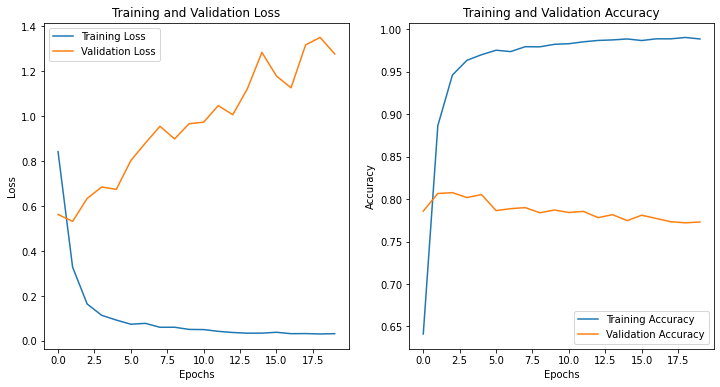

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_val_pred_prob = model.predict(X_val_padded)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

print("Accuracy:", accuracy_score(y_val_encoded, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val_encoded, y_val_pred))
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)
print("\nConfusion Matrix:\n", conf_matrix)

98/98 [==============================] - 6s 62ms/step
Accuracy: 0.7730473751600512

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       826
           1       0.74      0.75      0.75       724
           2       0.75      0.75      0.75       729
           3       0.81      0.80      0.81       845

    accuracy                           0.77      3124
   macro avg       0.77      0.77      0.77      3124
weighted avg       0.77      0.77      0.77      3124


Confusion Matrix:
 [[644  56  65  61]
 [ 57 545  71  51]
 [ 59  73 547  50]
 [ 63  60  43 679]]


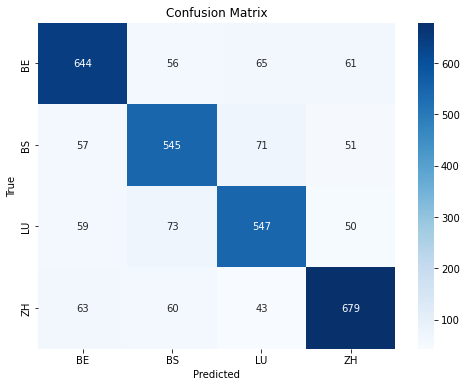

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()